
 MSE 3 - fold cross validation Using our algorithm
---------------------------------------------------
Learning Rate :  0.01
Avg MSE =  [0.03149826]
Standard Deviation :  0.003025935263709787


Learning Rate :  0.1
Avg MSE =  [0.00731849]
Standard Deviation :  5.277397071268373e-06


Learning Rate :  0.05
Avg MSE =  [0.01574574]
Standard Deviation :  0.0017902397988862366




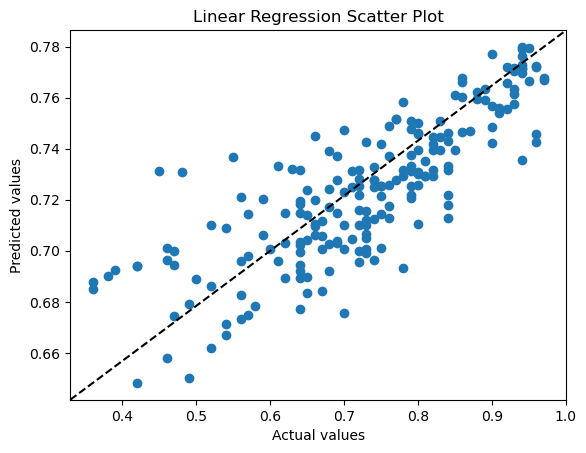


 MSE 3 - fold cross validation Using SCIKIT LEARN
---------------------------------------------------


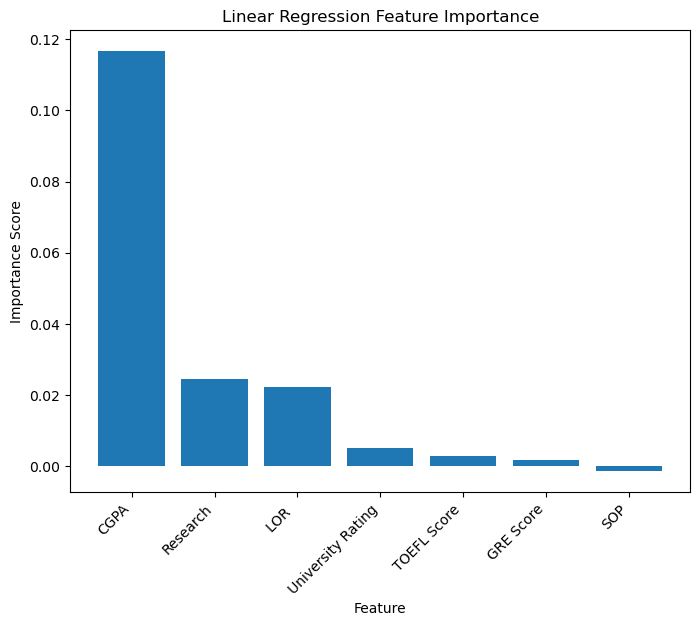


MSE Errors average :  0.004129660242664042
Standard Deviation :  0.00020749652109586822



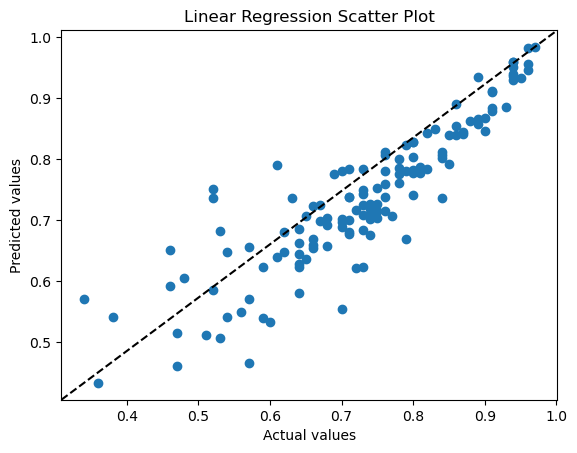

In [114]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np
import statistics
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt  
from sklearn.linear_model import LinearRegression




def MSE_error(y,y_pred):
    l=y.size
    err = 0
    for i in range(0,l):
        err =  err + pow((y[i] - y_pred[i]),2)
        
    return err/(2*l) # division by 2-to make the differentiation of the error function easier.

    
    
    
def predict(wts,X):
    
    lx=len(X)
    y_pred = np.zeros(lx)
    for i in range(0,lx):
         
        for j in range(0,len(wts)):
            y_pred[i] = y_pred[i]+(wts[j]*X[i][j] + wts[-1])
            
            # Multipling each weight by its feature and adding to the predicted value
            
    
    return y_pred





def gradient(y,y_pred,x):
    
    dw = np.zeros(x.shape[1])

    for i in range(x.shape[1]):
        for j in range(0,len(y)):
            dw[i] = - (y[j] - y_pred[j])*x[j][i] + dw[i]
    return dw/len(y)





def fit(x_train,y_train,num_iterations,learning_rate):
    
    no_of_rows = x_train.shape[0]
    no_of_columns = x_train.shape[1]
    
    #adding an extra column 
    new_x_train = np.ones((no_of_rows,no_of_columns+1))
    new_x_train[:,0:no_of_columns] = x_train
    
    #initializing wts as zero
    w = np.zeros(no_of_columns)
    
    w =np.append(w,1)
    #added bias
    
    
    for i in range(0,num_iterations):
        
        y_pred = predict(w,new_x_train)
        err = MSE_error(y_train,y_pred)

        mse_list.append(err)
        gd = gradient(y_train,y_pred,new_x_train)
        w = w - learning_rate*gd
                                 
    return w





def regression_test(x_test,w):
    row = x_test.shape[0]
    column = x_test.shape[1]
    
    new_x_test = np.ones((row,column+1))
    new_x_test[:,0:column] = x_test
    
    y_pred = predict(w,new_x_test)
    
    return(y_pred)




def Linear_Regression_skl():
    
    data = pd.read_csv('/Users/saiharshithtanguturi/Desktop/Workspacepython/Project/adm_data.csv')
    k = 3
    kf = KFold(n_splits=k, shuffle=True)
    mse_skl=[]
    importances_list = []
    
    print("\n MSE 3 - fold cross validation Using SCIKIT LEARN")
    print("---------------------------------------------------")
    for i, (train_index, test_index) in enumerate(kf.split(data)):
        
        train_data = data.iloc[train_index]
        test_data = data.iloc[test_index]


        X_train = train_data.iloc[:, :-1]
        Y_train = train_data.iloc[:, -1]
        X_test = test_data.iloc[:, :-1]
        Y_test = test_data.iloc[:, -1]
        
        model=LinearRegression()
        model.fit(X_train, Y_train)
        
        skl_pred= model.predict(X_test)
        
        mse = mean_squared_error(Y_test, skl_pred)
        
        mse_skl.append(mse)
        
        if i == k-1: # Plot feature importance for the last fold
            
            # Calculate and plot feature importances
            importances = model.coef_
            df_importances = pd.DataFrame({"Feature": X_train.columns, "Importance": importances})
            df_importances = df_importances.sort_values(by="Importance", ascending=False)
            
            plt.figure(figsize=(8, 6))
            plt.bar(x=df_importances["Feature"], height=df_importances["Importance"])
            plt.xticks(rotation=45, ha="right")
            plt.xlabel("Feature")
            plt.ylabel("Importance Score")
            plt.title("Linear Regression Feature Importance")
            plt.show()
    
    print("\nMSE Errors average : ",sum(mse_skl)/k)
    print("Standard Deviation : ",np.std(mse_skl))
    print()
    plt.scatter(Y_test, skl_pred)
    plt.xlabel("Actual values")
    plt.ylabel("Predicted values")
    plt.title("Linear Regression Scatter Plot")
    plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes, color='black', linestyle='--')
    plt.show()


    


    
    

    
def Linear_regressionSimple():
    data = pd.read_csv('/Users/saiharshithtanguturi/Desktop/Workspacepython/Project/adm_data.csv')
    k = 2
    mse_allfolds=[]
    min_mse=[]
    y_pred_all=[]
    y_test_all=[]
    print("\n MSE 3 - fold cross validation Using our algorithm")
    print("---------------------------------------------------")
    kf = KFold(n_splits=k, shuffle=True)
    for lr in [0.01,0.1,0.05]:
    #     all_wts=[]
        mse_allfolds=[]
        mse_skl_allfolds=[]
        for train_index, test_index in kf.split(data):

            train_data = data.iloc[train_index]
            test_data = data.iloc[test_index]


            X_train = train_data.iloc[:, :-1].values
            Y_train = train_data.iloc[:, -1].values.reshape(-1,1)
            X_test = test_data.iloc[:, :-1].values
            Y_test = test_data.iloc[:, -1].values.reshape(-1,1)    


            X_train = np.vstack((np.ones((X_train.shape[0], )), X_train.T)).T
            X_test = np.vstack((np.ones((X_test.shape[0], )), X_test.T)).T


            X_train_standardized = (X_train - X_train .mean()) / X_train.std()
            X_test_standardized  = (X_test - X_train.mean()) /  X_train.std()


            mse_list = []

            learning_rate = lr
            num_iterations=1000
            w = fit(X_train_standardized,Y_train,num_iterations,learning_rate)
            Y_pred = regression_test(X_test_standardized,w)


            mse = MSE_error(Y_test,Y_pred)




            mse_allfolds.append(mse)
            mse_skl_allfolds.append(mse_skl)
            all_wts.append(w)
            if lr==0.1:
                plot_test=Y_test
                plot_pred=Y_pred



        y_pred_all.append(Y_pred)
        y_test_all.append(Y_test)

        min_mse.append(sum(mse_allfolds)/k)




        print("Learning Rate : ",lr)
        print("Avg MSE = ",sum(mse_allfolds)/k)
        print("Standard Deviation : ",np.std(mse_allfolds))
        print()

        print()

    



    plt.scatter(plot_test, plot_pred)
    plt.xlabel("Actual values")
    plt.ylabel("Predicted values")
    plt.title("Linear Regression Scatter Plot")
    plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes, color='black', linestyle='--')
    plt.show()
    
Linear_regressionSimple()
Linear_Regression_skl()

Independent variable noise :  [-0.73397554  0.69829278  1.38332955 -1.16214625 -0.58175388  1.54810539
 -2.46994039 -0.88656616  1.21833499 -0.72739864 -0.38911534  0.19513592
  1.35395085 -1.34694312 -0.77853327  0.37174525  2.65395924  2.37159588
  0.62340678  0.38800898  0.10953423  1.21476359 -1.05843554  0.99500908
 -0.7755797  -1.34711446  0.47438906 -2.11602469 -0.75874533 -0.79972695
 -1.05583964 -2.42165472 -1.89494099 -0.66548307  1.0887508  -0.39071894
  0.51908577  0.59105135 -0.58250122  0.18407113 -0.65992932 -1.58783816
 -0.26591482  0.08665194  0.55652694 -0.17130899  2.70760928 -0.66333456
  0.24617789  2.41986612 -0.36262153 -0.62125884  1.40248676 -1.64408894
  0.40102634  1.02902436  1.1860585   1.81253554  1.5104656   2.54870539
 -0.77577369  0.71524006  0.25354766 -1.61803382  1.91236549  0.63035937
  0.36346143 -0.09079055 -0.58880821  0.40961387 -0.13825327 -1.49439888
  1.86638862 -1.40155845 -2.78340164  0.70491779  0.22894661 -0.83613608
 -1.27076432 -1.93936

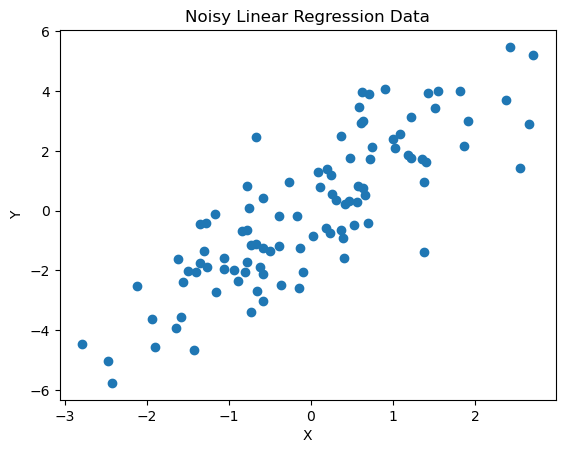

In [116]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(123)

# Generate independent variable
x = np.random.normal(0, 1, size=100)

# Generate dependent variable with measurement error bias
y = 2 * x + np.random.normal(0, 1, size=100)
x_noisy = x + np.random.normal(0, 0.5, size=100)
y_noisy = y + np.random.normal(0, 0.5, size=100)

#printing the noise in each
print("Independent variable noise : ",x_noisy)
print("Dependent variable noise : ",y_noisy)

# Plot the noisy data
plt.scatter(x_noisy, y_noisy)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Noisy Linear Regression Data')
plt.show()
